# Data visualisation

In [79]:
import os
import pandas as pd
import glob
import json
data_path = "../data/interim/v4"
test_cases = [file.split("-")[2] for file in glob.glob(f"{data_path}/*stage_5*.csv")]
# List test cases in dataset
for i,test_case in enumerate(test_cases):
    print(i,test_case)


0 milenkosRoomNearDevicesWithTraffic
1 milenkoParkWithTraffic
2 milenkosKitchenNotNearDevicesWithTraffic1
3 milenkosKitchenNotNearDevicesWithTraffic
4 milenkoParkWithTraffic1 
5 milenkosRoomNearDevicesWithTraffic1


In [80]:
# read all data in dataset
data_off = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_5*{test_case}*")[0]) for test_case in test_cases}
data_on = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_6*{test_case}*")[0]) for test_case in test_cases}

# extract one sample from data
i = 0
df_on = data_on[test_cases[i]]
df_off = data_off[test_cases[i]]

In [81]:
def add_intensity(df: pd.DataFrame):
    """
    add Intensity as 2nd norm of 3D vector
    """
    df["Intensity"] = (df["X_UnCal"] ** 2 + df["Y_UnCal"] ** 2 + df["Z_UnCal"] ** 2) ** 0.5

add_intensity(df_on)
add_intensity(df_off)
for key in data_off.keys():
    add_intensity(data_off[key])
for key in data_on.keys():
    add_intensity(data_on[key])

In [82]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,6002.000000,6002.000000,6002.000000,6002.000000,6.002000e+03,6.002000e+03,6.002000e+03
mean,21.485094,52.213347,-75.450035,94.258160,-1.987180e+01,4.759026e+01,-3.183421e+01
std,1.653482,0.533285,1.256461,0.739220,3.553010e-15,7.106019e-15,7.106019e-15
min,5.160600,47.933800,-86.803000,86.313807,-1.987180e+01,4.759026e+01,-3.183421e+01
25%,21.105999,51.938450,-75.871796,93.866747,-1.987180e+01,4.759026e+01,-3.183421e+01
50%,21.764800,52.240400,-75.383800,94.231456,-1.987180e+01,4.759026e+01,-3.183421e+01
75%,22.338200,52.545400,-74.859200,94.606753,-1.987180e+01,4.759026e+01,-3.183421e+01
max,26.144600,54.570600,-64.318400,99.915877,-1.987180e+01,4.759026e+01,-3.183421e+01


In [83]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5.998000e+03,5998.000000,5.998000e+03
mean,18.273901,51.575754,-76.356628,93.948813,-1.987180e+01,47.590263,-3.183421e+01
std,1.208670,0.432664,0.892177,0.626693,3.553010e-15,0.000000,7.106020e-15
min,9.076799,49.068398,-83.545600,91.842454,-1.987180e+01,47.590263,-3.183421e+01
25%,17.531399,51.313198,-76.750200,93.567313,-1.987180e+01,47.590263,-3.183421e+01
50%,18.239000,51.581600,-76.311000,93.908219,-1.987180e+01,47.590263,-3.183421e+01
75%,19.068600,51.862198,-75.847400,94.276252,-1.987180e+01,47.590263,-3.183421e+01
max,21.752600,53.191998,-74.066200,98.699186,-1.987180e+01,47.590263,-3.183421e+01


In [84]:
def statistical_features(df: pd.DataFrame, column_name='Intensity'):
    return df[column_name].describe().to_dict()
statistical_features(df_on)

{'count': 6002.0,
 'mean': 94.25815953846319,
 'std': 0.7392204317310728,
 'min': 86.31380671966681,
 '25%': 93.86674688067122,
 '50%': 94.23145584123205,
 '75%': 94.60675330570865,
 'max': 99.91587726682882}

In [155]:
def statistical_features_per_test_case(df: pd.DataFrame, test_case_name: str, test_case_class: int) -> pd.DataFrame:
    statistics = df[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].describe()
    #print(df)
    #print (df.columns)
    d = dict()  
    #columns = []
    #values = []
    print(statistics)
    for col_name in statistics.columns:
        for row_name, value in statistics.iterrows():
            d[f"{col_name}_{row_name}"] = value[col_name]
            #columns.append(f"{col_name}_{row_name}")
            #values.append(value[col_name])
            # print(col_name)
            # print('-----------')
            # print(row_name)
            # print('-----------')
            # print(value)
            # # print(col_name, row_name, value) 
            # print('-----------')
            # print('-----------')
    #print(columns)
    #print(values)
    for feature in ['X_Bias', 'Y_Bias', 'Z_Bias', 'Accuracy']:
        d[feature] = df[feature][0]
    return pd.DataFrame(data=d, index=range(1))

statistical_features_per_test_case(
    df_on, 
    test_case_name="milenkosRoomNearDevicesWithTraffic",
    test_case_class=6
    )

           X_UnCal      Y_UnCal      Z_UnCal    Intensity
count  6002.000000  6002.000000  6002.000000  6002.000000
mean     21.485094    52.213347   -75.450035    94.258160
std       1.653482     0.533285     1.256461     0.739220
min       5.160600    47.933800   -86.803000    86.313807
25%      21.105999    51.938450   -75.871796    93.866747
50%      21.764800    52.240400   -75.383800    94.231456
75%      22.338200    52.545400   -74.859200    94.606753
max      26.144600    54.570600   -64.318400    99.915877


,X_UnCal_count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,X_UnCal_50%,X_UnCal_75%,X_UnCal_max,Y_UnCal_count,Y_UnCal_mean,...,Intensity_std,Intensity_min,Intensity_25%,Intensity_50%,Intensity_75%,Intensity_max,X_Bias,Y_Bias,Z_Bias,Accuracy
0,6002.0,21.485094,1.653482,5.1606,21.105999,21.7648,22.3382,26.1446,6002.0,52.213347,...,0.73922,86.313807,93.866747,94.231456,94.606753,99.915877,-19.871798,47.590263,-31.83421,1


In [125]:
columns = ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']
data_on_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_on.items()}
data_off_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_off.items()}
print(json.dumps(data_on_statistics, indent=4))

{
    "milenkosRoomNearDevicesWithTraffic": {
        "X_UnCal": {
            "count": 6002.0,
            "mean": 21.485094151766077,
            "std": 1.6534819209403189,
            "min": 5.1605997,
            "25%": 21.105999,
            "50%": 21.7648,
            "75%": 22.3382,
            "max": 26.1446
        },
        "Y_UnCal": {
            "count": 6002.0,
            "mean": 52.213346780739755,
            "std": 0.5332851333911577,
            "min": 47.9338,
            "25%": 51.938449500000004,
            "50%": 52.2404,
            "75%": 52.5454,
            "max": 54.5706
        },
        "Z_UnCal": {
            "count": 6002.0,
            "mean": -75.45003525241586,
            "std": 1.2564606893651797,
            "min": -86.803,
            "25%": -75.871796,
            "50%": -75.3838,
            "75%": -74.8592,
            "max": -64.3184
        },
        "Intensity": {
            "count": 6002.0,
            "mean": 94.25815953846319,
     

In [132]:
for name, data in data_on_statistics.items():
    for col, data1 in data.items():
        
        #print(json.dumps(data1, indent=4))
        for stat, data2 in data1.items():
            print(name, f"{col}_{stat}", data2)


milenkosRoomNearDevicesWithTraffic X_UnCal_count 6002.0
milenkosRoomNearDevicesWithTraffic X_UnCal_mean 21.485094151766077
milenkosRoomNearDevicesWithTraffic X_UnCal_std 1.6534819209403189
milenkosRoomNearDevicesWithTraffic X_UnCal_min 5.1605997
milenkosRoomNearDevicesWithTraffic X_UnCal_25% 21.105999
milenkosRoomNearDevicesWithTraffic X_UnCal_50% 21.7648
milenkosRoomNearDevicesWithTraffic X_UnCal_75% 22.3382
milenkosRoomNearDevicesWithTraffic X_UnCal_max 26.1446
milenkosRoomNearDevicesWithTraffic Y_UnCal_count 6002.0
milenkosRoomNearDevicesWithTraffic Y_UnCal_mean 52.213346780739755
milenkosRoomNearDevicesWithTraffic Y_UnCal_std 0.5332851333911577
milenkosRoomNearDevicesWithTraffic Y_UnCal_min 47.9338
milenkosRoomNearDevicesWithTraffic Y_UnCal_25% 51.938449500000004
milenkosRoomNearDevicesWithTraffic Y_UnCal_50% 52.2404
milenkosRoomNearDevicesWithTraffic Y_UnCal_75% 52.5454
milenkosRoomNearDevicesWithTraffic Y_UnCal_max 54.5706
milenkosRoomNearDevicesWithTraffic Z_UnCal_count 6002.0
m

## Best feature: standard diviation on intensity
- biggest difference when no devices nearby (park, even room without devices)

In [135]:
statistics = 'std'
# one of ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
column = 'Intensity'
# one of ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']


name_len = max([len(test_case) for test_case in test_cases])
print(f"Comparison of '{statistics}' statistic for {column} between modes in same test_session")
print(f"{'test_case':<{name_len}}  {'on':<8} {'off':<8} {'percentage diff'}")
print('-'*(35+name_len))
for test_case in test_cases:
    on = data_on_statistics[test_case][column][statistics]
    off = data_off_statistics[test_case][column][statistics]
    print(f"{test_case:<{name_len}} {on : .5f} {off : .5f} {(on - off) / on : .5f}")

Comparison of 'std' statistic for Intensity between modes in same test_session
test_case                                  on       off      percentage diff
----------------------------------------------------------------------------
milenkosRoomNearDevicesWithTraffic         0.73922  0.62669  0.15222
milenkoParkWithTraffic                     1.30874  0.85173  0.34920
milenkosKitchenNotNearDevicesWithTraffic1  1.07927  0.70414  0.34758
milenkosKitchenNotNearDevicesWithTraffic   1.07927  0.70414  0.34758
milenkoParkWithTraffic1                    1.32585  0.76795  0.42079
milenkosRoomNearDevicesWithTraffic1        0.73922  0.68290  0.07619


In [87]:
start = 5000
size = 300

<AxesSubplot: title={'center': 'Stage All on'}>

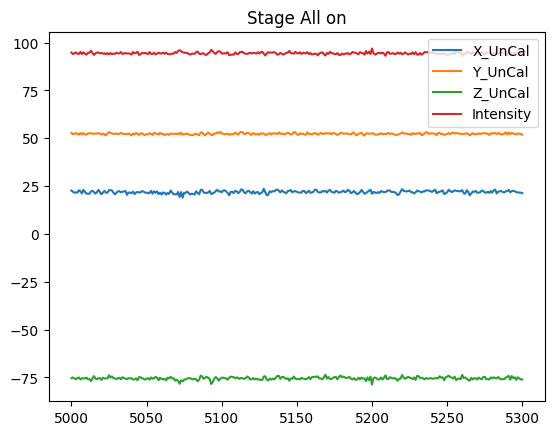

In [88]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All on")

<AxesSubplot: title={'center': 'Stage All off'}>

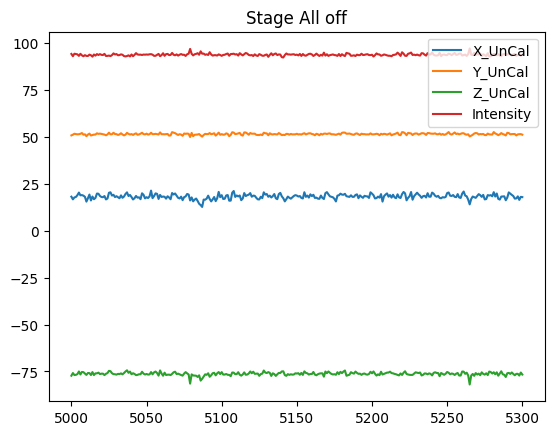

In [89]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All off")

# Fourier

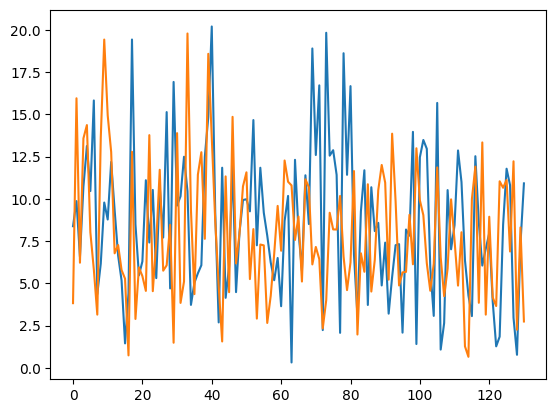

In [90]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np
yf_off = rfft(df_off['Intensity'].loc[start:start+size].to_numpy())
yf_on = rfft(df_on['Intensity'].loc[start:start+size].to_numpy())
# print(yf_off)
# n of samples, spacing
#xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(np.abs(yf_off)[20:])
plt.plot(np.abs(yf_on)[20:])
plt.show()